## Memory Test on Drugged Islanders Experiment Analysis
__Project Description:__

An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]: A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg] T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg] S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

- Dosages follow a 1:1 ratio to ensure validity 
- Happy or Sad memories were primed 10 minutes prior to testing 
- Participants tested every day for 1 week to mimic addiction

Building the Case: Obstructive effects of Benzodiazepines (Anti-Anxiety Medicine): - Long term adverse effects on Long Term Potentiation of synapses, metacognition and memory recall ability http://www.jstor.org/stable/43854146

Happy Memories: - research shown positive memories to have a deeper and greater volume of striatum representation under an fMRI https://www.sciencedirect.com/science/article/pii/S0896627314008484

Sad Memories: - research shown sad memories invokes better memory recall for evolutionary purpose whereas, happy memories are more susceptible to false memories http://www.jstor.org/stable/40064315

Participants - all genders above 25+ years old to ensure a fully developed pre-frontal cortex, a region responsible for higher level cognition and memory recall.

__Questions to be answered:__

How does anti-anxiety medicine affect you differently by age? Is there a level of plateauing in effectiveness of anti-anxiety medicine - if so, at what point? Effect of anti-anxiety medicine on memory recall? Effectiveness of placebos in a test environment?

Link to data for future reference: https://www.kaggle.com/steveahn/memory-test-on-drugged-islanders-data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statsmodels.api as sms
import statsmodels.formula.api as smsf
import scipy.stats as stats
import sklearn
import pyDOE as pydoe
import pyDOE2 as pydoe2
from statsmodels.graphics.factorplots import interaction_plot
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.gofplots import ProbPlot
import patsy as pt

In [2]:
# Load the data
islanders = pd.read_csv('datasets/Islander_data.csv', encoding = 'ISO-8859-1')
islanders.head(10)

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
5,Liam,Carrasco,37,S,1,A,66.4,58.1,-8.3
6,Ava,Durand,35,S,1,A,44.1,56.0,11.9
7,Jamie,Durand,38,H,1,A,76.3,74.8,-1.5
8,Josefa,Durand,29,H,1,A,56.2,45.0,-11.2
9,Mark,Durand,36,S,1,A,54.8,75.9,21.1


In [3]:
# Figure out what the unique of the predictor variables in the table are:
print('The unique last names are', islanders.last_name.unique())
print('The ages of the islanders in this dataset is', np.sort(islanders.age.unique()))
print('The unique values for the primed happy or sad memories is', islanders.Happy_Sad_group.unique())
print('The dosage amounts given of each drug are', islanders.Dosage.unique())
print('The coded drug types are', islanders.Drug.unique())

The unique last names are ['Carrasco' 'Durand' 'Gonzalez' 'Kennedy' 'Lopez' 'McCarthy' 'Morin'
 'Price' 'Summers' 'Takahashi' 'Bernard' 'Hajek' 'Rodriguez' 'Steiner'
 'Connolly' 'Castro' 'Fiala' 'Novak']
The ages of the islanders in this dataset is [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 59 60 62 63 65 66 68 69 72 73 80 83]
The unique values for the primed happy or sad memories is ['H' 'S']
The dosage amounts given of each drug are [1 2 3]
The coded drug types are ['A' 'S' 'T']


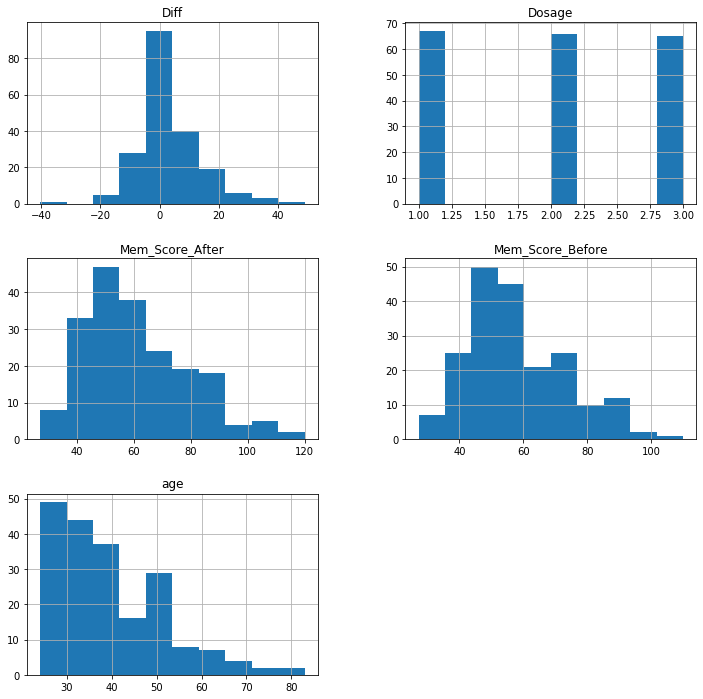

In [4]:
pd.DataFrame.hist(islanders, figsize = (12,12))
plt.savefig('project_imgs/contin_hists.jpg', pad_inches = 0.1)
plt.show()

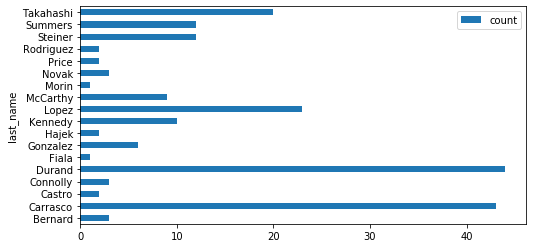

In [5]:
last_names = islanders.groupby('last_name').count().reset_index()
last_names = last_names[['last_name', 'first_name']]
last_names.columns = ['last_name', 'count']
ax0 = last_names.plot.barh(x='last_name', y='count', figsize = (8,4))
plt.savefig('project_imgs/amt_by_last_name.jpg', pad_inches = 0.1)
plt.show()

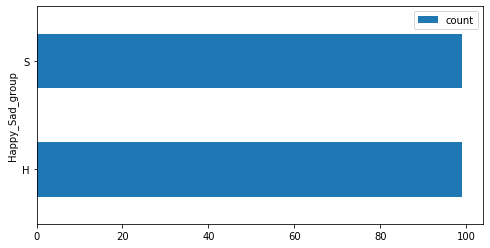

In [6]:
happy_sad = islanders.groupby('Happy_Sad_group').count().reset_index()
happy_sad = happy_sad[['Happy_Sad_group', 'last_name']]
happy_sad.columns = ['Happy_Sad_group', 'count']
ax1 = happy_sad.plot.barh(x='Happy_Sad_group', y='count', figsize = (8,4))
plt.savefig('project_imgs/primed_thoughts.jpg', pad_inches = 0.1)
plt.show()

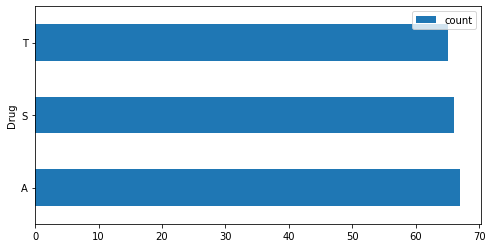

In [7]:
drug = islanders.groupby('Drug').count().reset_index()
drug = drug[['Drug', 'last_name']]
drug.columns = ['Drug', 'count']
ax2 = drug.plot.barh(x='Drug', y='count', figsize = (8,4))
plt.savefig('project_imgs/drug_type.jpg', pad_inches = 0.1)
plt.show()

It appears we have fairly balanced levels of treatments. We need to effectively analyze the effects of these categorical and continuous variables. The dimension of our data is:

In [8]:
print(islanders.values.shape)

(198, 9)


Matrix for linear model we are about to fit:

In [9]:
y, X = pt.dmatrices('Diff~Happy_Sad_group+C(Dosage, Sum)+C(Drug, Sum)+C(Dosage, Sum)*C(Drug, Sum)',
                       islanders, return_type='matrix')
print(y[:10])
print(X[:10])

[[ -2.3]
 [ -0.9]
 [ -4.6]
 [ -0.5]
 [  0.1]
 [ -8.3]
 [ 11.9]
 [ -1.5]
 [-11.2]
 [ 21.1]]
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]]


Okay, we see that some of the columns will probably be completely useless to this analysis, such as the first name. It is unlikely that the last name of the islanders will be effectual in the analysis of the data unless there is some unknown familial effect that we do not know about. Since do not have that information, we will have to assume that there is no sort of familial neurological quirks that could potentially affect the response.

Age is not something we can control for either. Since we cannot assign treatments based on the age of the patient, as this introduces a ton of bias and is unethical, we can only randomize the treatment to balance out age's effect on participants' response time. So, with that we will try to analyze the effect of the drug type and dosage on the memory score after drug addiction was achieved and the difference in memory scores before and after taking the drug.

#### ANOVA for After Drug Addiction
We attempt to fit a lienar model of the difference in memory scores using the type of memory the participants were primed with, either happy or sad. This will be a block effect that we have to account for. The dosage of the drug the patients took, either 1, 2, or 3, and then the interaction between drug dosage and drug administered. We treat the dosage as a categorical variable because the amount of drug administered is not equivalent for each drug. This experiment is a $3^2$ factorial experiment.

In [10]:
# Block + Dosage + Drug Type + Interaction between Dosage and Drug Type
lm_msa = smsf.ols('Diff~Happy_Sad_group+C(Dosage, Sum)+C(Drug, Sum)+C(Dosage, Sum)*C(Drug, Sum)', data = islanders).fit()
print(lm_msa.summary())

                            OLS Regression Results                            
Dep. Variable:                   Diff   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           8.03e-22
Time:                        21:39:32   Log-Likelihood:                -688.10
No. Observations:                 198   AIC:                             1396.
Df Residuals:                     188   BIC:                             1429.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [11]:
lm_table = sms.stats.anova_lm(lm_msa, typ = 1)
lm_table

,df,sum_sq,mean_sq,F,PR(>F)
Happy_Sad_group,1.0,9.689091,9.689091,0.150544,6.984550e-01
"C(Dosage, Sum)",2.0,1224.603642,612.301821,9.513623,1.159451e-04
"C(Drug, Sum)",2.0,4309.257305,2154.628652,33.477483,3.658230e-13
"C(Dosage, Sum):C(Drug, Sum)",4.0,5141.980736,1285.495184,19.973346,1.012301e-13
Residual,188.0,12099.780135,64.360533,NaN,NaN


Based on the output of the model, we can see that the dosage, drug, and their interaction effects are significant at an $\alpha = 0.05$ significance level. The block effect, `Happy_Sad_group`, has an insignificant effect, as its respective p-value is `0.698455`, which is significantly larger than $\alpha = 0.05$. We want to look significant differences in the 9 different treatment combinations. We will do this by using a Tukey test.
#### Tukey Test
The test is run as follows:

H<sub>0</sub>: $\mu_i = \mu_j$

H<sub>1</sub>: $\mu_i \neq \mu_j$

It uses the studentized range statistic:

$q = \frac{\bar{y_{max}} - \bar{y_{min}}}{\sqrt{MS_{error}/n}}$

Two means are different if the absolute value of their sample mean differences exceeds:

$T_{\alpha} = q_{\alpha}(a, f)\sqrt{\frac{MS_{error}}{n}}$

where $a$ is the number of parameters and $f = N - a$. This is how the test for the drug dosage and drug type are run. The Tukey test for the interactions is the same, but now we have $a*b$ different treatment combinations and $f = N - ab$.

In [12]:
# Getting the pairwise differences for drugs
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [13]:
mc1 = MultiComparison(islanders['Diff'], islanders['Drug'])
result1 = mc1.tukeyhsd()
print(result1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      S  -9.6414 0.001  -13.629 -5.6537   True
     A      T -10.0578 0.001 -14.0609 -6.0547   True
     S      T  -0.4165   0.9  -4.4345  3.6015  False
----------------------------------------------------


In [14]:
# Differences in Dosage
mc2 = MultiComparison(islanders['Diff'], islanders['Dosage'])
result2 = mc2.tukeyhsd()
print(result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.6118 0.6389 -2.6956  5.9193  False
     1      3   5.8994 0.0042  1.5753 10.2235   True
     2      3   4.2876 0.0537 -0.0527  8.6278  False
----------------------------------------------------


In [15]:
# Differences in Dosage and Drug Combinations
islanders['Combination'] = islanders['Drug'].astype(str) + islanders['Dosage'].astype(str)
islanders.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Combination
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,A1
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,A1
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,A1
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,A1
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,A1


In [16]:
# Differences in combinations
mc3 = MultiComparison(islanders['Diff'], islanders['Combination'])
result3 = mc3.tukeyhsd()
print(result3)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    A1     A2   5.5775 0.3256   -1.913  13.0679  False
    A1     A3  22.3366  0.001  14.8461   29.827   True
    A1     S1    2.082    0.9  -5.4084   9.5724  False
    A1     S2  -1.0589    0.9  -8.5493   6.4315  False
    A1     S3  -2.4498    0.9  -9.9402   5.0406  False
    A1     T1  -1.5453    0.9  -9.0357   5.9452  False
    A1     T2   0.8457    0.9  -6.6448   8.3361  False
    A1     T3  -2.0282    0.9  -9.6092   5.5529  False
    A2     A3  16.7591  0.001   9.1859  24.3323   True
    A2     S1  -3.4955 0.8691 -11.0687   4.0777  False
    A2     S2  -6.6364 0.1375 -14.2096   0.9368  False
    A2     S3  -8.0273 0.0287 -15.6005  -0.4541   True
    A2     T1  -7.1227 0.0837 -14.6959   0.4505  False
    A2     T2  -4.7318 0.5624  -12.305   2.8414  False
    A2     T3  -7.6056 0.0535 -15.2685   0.0572  False
    A3    

#### Residual Diagnostics
We need to make sure that our assumptions are correct about the errors, that they are independent and identically distributed as follows: $\mathbf{\epsilon} \sim \mathbf{N}(\mathbf{0}, \mathbf{\sigma^2})$. We will do this by checking the normal probability plot of the residuals and various residual plots. We will also run a Bruesch-Pagan test for constant variance.

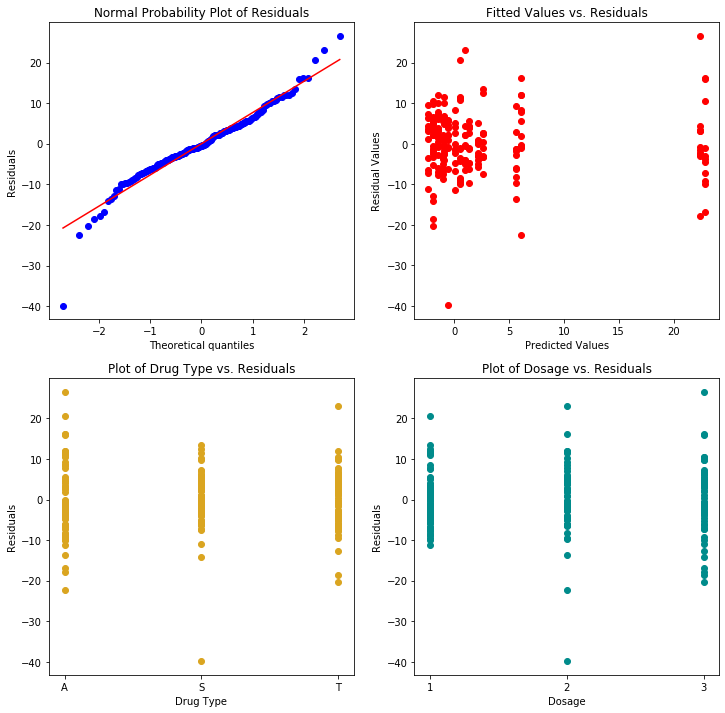

In [17]:
mod_res = lm_msa.resid
mod_preds = lm_msa.predict()
# Normal Probability Plot
from statsmodels.graphics.gofplots import ProbPlot

plt.figure(figsize = (12, 12))
plt.subplot(221)
res_prob_100m_m = stats.probplot(mod_res, plot= plt)
plt.title('Normal Probability Plot of Residuals')
plt.ylabel('Residuals')

plt.subplot(222)
plt.scatter(mod_preds, mod_res, color = 'r')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Fitted Values vs. Residuals')

plt.subplot(223)
plt.scatter(islanders['Drug'], mod_res, color = 'goldenrod')
plt.xlabel('Drug Type')
plt.ylabel('Residuals')
plt.title('Plot of Drug Type vs. Residuals')

plt.subplot(224)
plt.scatter(islanders['Dosage'], mod_res, color = 'darkcyan')
plt.xlabel('Dosage')
plt.xticks([1, 2, 3])
plt.ylabel('Residuals')
plt.title('Plot of Dosage vs. Residuals')
plt.savefig('project_imgs/mod_diagnostics.jpeg')
plt.show()

Based on these diagnostics, there are some clear outliers such as the prediction that was off by 40. There may be some concern about the normality of the errors as well. We would certainly like to see if this is just a true outlier and only need to investigate the reason for such an outlier, or if there should be any concerns about non-constant variance. We will thus run a Bruesch-Pagan test for constant variance.

We regress the function: $log(\sigma^2_i) = \gamma_0 + \gamma_1 x_{i1} + \gamma_2 x_{i2} + \gamma_3 x_{i1}x_{i2}$

$H_0: \mathbf{\gamma}= 0$

$H_1: \mathbf{\gamma} \neq 0$

Test statistic: $\frac{SSR^* / 4}{(SSE / n)^2}$

Where $SSR^*$ is the regression sum of squares for the log regression of the residuals.

Critical value for the rejection region would be $\chi^2_{\alpha/2; 3}$, and we will test at an $\alpha$ = 0.05 level.

In [18]:
from statsmodels.stats import diagnostic as dn
bp_lm_msa = dn.het_breuschpagan(mod_res, lm_msa.model.exog)
print("The Breusch-Pagan test yields a p-value of: ", bp_lm_msa[3],".")

The Breusch-Pagan test yields a p-value of:  0.5872865517519477 .


Based on the results of the Breusch-Pagan test, we can say that there is not enough evidence to suggest that the variance is not constant at a significance level of $\alpha = 0.05$. It appears that even though there is no evidence that there is not constant variance and besides the outliers, the errors appear to be normally distributed. We just have to figure out why these outlying values exist.

In [19]:
sorted_abs_residuals = np.sort(np.abs(mod_res))[::-1]

In [20]:
islanders['res'] = mod_res
islanders['abs_res'] = np.abs(mod_res)
islanders.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Combination,res,abs_res
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,A1,-2.384105,2.384105
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,A1,-1.406237,1.406237
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,A1,-4.684105,4.684105
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,A1,-1.006237,1.006237
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,A1,0.015895,0.015895


In [21]:
big_ind1 =  islanders.loc[islanders['abs_res'] == sorted_abs_residuals[0]].index[0]

In [23]:
islanders.iloc[[big_ind1]]

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Combination,res,abs_res
109,Eva,Takahashi,31,S,2,S,84.5,44.1,-40.4,S2,-39.856521,39.856521


In [24]:
big_ind2 =  islanders.loc[islanders['abs_res'] == sorted_abs_residuals[1]].index[0]
islanders.iloc[[big_ind2]]

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Combination,res,abs_res
48,Miki,Carrasco,35,H,3,A,65.0,114.0,49.0,A3,26.570157,26.570157


In [25]:
big_ind3 = islanders.loc[islanders.abs_res == sorted_abs_residuals[2]].index[0]
islanders.iloc[[big_ind3]]

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,Combination,res,abs_res
168,Naoto,Lopez,35,H,2,T,33.4,57.5,24.1,T2,23.161066,23.161066


There does not appear to be any discernable reason for why the residual values are so far off. Based on the largest difference, the woman took a sugar pill and her memory score difference dropped significantly, so it really is not the drug. Maybe her memory was just triggered faster the second time around. For the other two individuals, it appears that the drugs had a larger effect on the participants than the model predicted.

#### Interaction Plots
We want to analyze the interaction plots between the different treatment combinations.

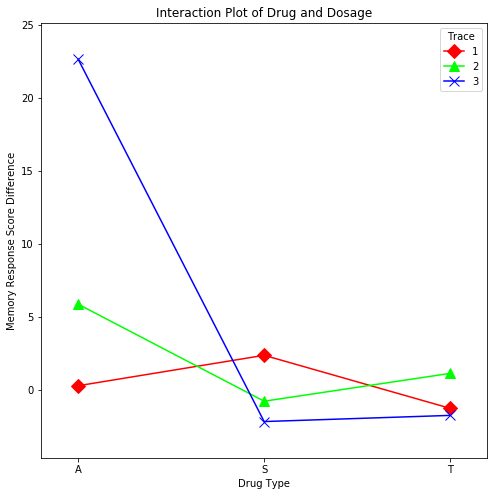

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = interaction_plot(x=np.array(islanders.Drug), trace=np.array(islanders.Dosage), response=np.array(islanders.Diff), 
                       markers=['D', '^', 'x'], ms=10, ax=ax)
plt.xlabel('Drug Type')
plt.ylabel('Memory Response Score Difference')
plt.title('Interaction Plot of Drug and Dosage')
plt.savefig('project_imgs/interaction_plot.jpeg')
plt.show()

#### Power and Optimality
We want to try to calculate the power of this experiment. We also want to try to figure out if the experiment is in any way optimal (D, G, etc.) and then try to suggest different model parameters if the experiment had the wrong calculated power or if there is an optimal suggested design.

As the effect size increases, the power of a statistical test increases. The effect size, d, is defined as the number of standard deviations between the null mean and the alternate mean. Symbolically,

$d = \frac{\mu_1 - \mu_0}{\sigma}$

Here, we do not really have any good idea of how many standard deviations from the mean the different treatment groups will be, but we will assume that the effect is approximately 0.25.

In [27]:
from statsmodels.stats.power import ftest_anova_power

# For the regression model we have 
# nobs = sample size
# alpha = prob type I error, here is 0.05
# effect size will be 0.25
effect_size = 0.25
nobs = len(islanders) # 198
alpha = 0.05
k_groups = 9 # the number of different potential treatment combinations

print(ftest_anova_power(effect_size, nobs, alpha, k_groups=9, df=None))

0.6795005056325211


Suppose we want to try to reduce the probability of a type II error to at most 0.05, i.e. have a power of at least 0.95. We would need to either increase the effect size, or we need to increase the sample size. Assuming the effect of a treatment on these islanders stays fixed, we would need to increase sample size.

In [28]:
print(ftest_anova_power(effect_size, 372, alpha, k_groups=9, df=None))
print(ftest_anova_power(effect_size, 378, alpha, k_groups = 9, df = None))

0.9501657697493382
0.953733645479122


In this case we would need to increase the number of samples to at least 372 people. In order to ensure a 1-to-1 ratio between the 9 different groups, we would have to increase the sample size to 378.
#### Optimality
We want to figure out what the determinant of $\mathbf{X}^T\mathbf{X}$ is in order to determine if the design is D-optimal. All of our predictor variables are bounded by $[0,1]$ since we had to treat them as categorical variable factors as either the units did not match to make an appropriate comparison or could not be ranked ordinally. The volume of the jount confidence region that contains all the model parameter estimates is inversly proportional to the square root of the determinant of $\mathbf{X}^T\mathbf{X}$, so this would minimize the area of the joint confidence region. We thus want to make the determinant of $\mathbf{X}^T\mathbf{X}$ as large as possible.

In [29]:
XtX = np.dot(np.transpose(np.asarray(X)), np.asarray(X))
determinant_XtX = np.linalg.det(XtX)
rank_XtX = np.linalg.matrix_rank(XtX)
print(XtX, determinant_XtX, rank_XtX)

[[198.  99.   2.   1.   2.   1.   0.  -1.  -1.  -1.]
 [ 99.  99.   2.   1.   2.   1.   0.  -1.  -1.  -1.]
 [  2.   2. 132.  65.   0.  -1.   2.   1.   1.   1.]
 [  1.   1.  65. 131.  -1.  -1.   1.   1.   1.   1.]
 [  2.   2.   0.  -1. 132.  65.   2.   1.   1.   1.]
 [  1.   1.  -1.  -1.  65. 131.   1.   1.   1.   1.]
 [  0.   0.   2.   1.   2.   1.  88.  43.  43.  21.]
 [ -1.  -1.   1.   1.   1.   1.  43.  87.  21.  43.]
 [ -1.  -1.   1.   1.   1.   1.  43.  21.  87.  43.]
 [ -1.  -1.   1.   1.   1.   1.  21.  43.  43.  87.]] 3.1678622793397047e+19 10


Given that the determinant is extremely large, the matrix $\mathbf{X}^T\mathbf{X}$ has full rank, and the determinant of $\mathbf{X}^T\mathbf{X}$ it seems plausible that this is a D-optimal design but a further investigation would need to be carried out in order to determine if this is actually the case. We also want to try to figure out if a design is minimizing the maximum prediction variance over a design space, we need to look at the variance of the current model. There is constant variation that comes with the estimation of the model parameters.

In [30]:
# G optimality?
inverse_XtX = np.linalg.inv(XtX)
#print(inverse_XtX)
diags = []
for i in range(rank_XtX):
    entry = inverse_XtX[i, i]
    diags.append(entry)
    
sum_of_diags = np.sum(diags)
sum_of_diags

0.1508897955388174

We hypothetically regressed the model:

$\hat{y} = \beta_0 + \beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_4+\beta_5x_5+\beta_6x_2x_4+\beta_7x_3x_4+\beta_8x_2x_5+\beta_9x_3x_5$

In order to calculate the maximum prediction variance for this model, we would need to calculate:

$V(\mathbf{X}\beta) = \sigma^2 \sum_{i=1}^{10}(\mathbf{X}^T\mathbf{X}_{ii})^{-1}(1+x_1+x_2+x_3+x_4+x_5+x_2x_4+x_3x_4+x_2x_5+x_3x_5)$

This is maximized when $x_1 = 1$ and then one of $x_2, x_3$ and one of $x_4, x_5$ are equal to one as well. This would be equal to:

In [31]:
sum_of_diags * (1+1+1+1+1)

0.754448977694087

$V(\mathbf{X}\beta) = 0.75445\sigma^2$. It seems unlikely that this is the minimum possible maximum variance of this experimental design, but again further investigations would be needed to check if this is the case.